### Ploting composite of Thermal Advection-Ekwacu Samuel 

In [1]:
#conda install -c conda-forge xarray dask netCDF4 bottleneck

In [1]:
#conda install -c conda-forge geocat-viz

In [64]:
# Import existing code modules
import xarray as xr
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import geocat.viz as gv

### 1. Read 950 hPa Thermal advection data

In [65]:
#ds = xr.open_dataset('C:/Diabatic_data/extra3/advection/Horizontal_temp-adv_1961-2021_mon_950hpa.nc')
ds = xr.open_dataset('C:/Diabatic_data/extra3/advection/vertical_temp-adv_1961-2021_mon_950hpa.nc')
ds.data_vars
#ds

Data variables:
    tadv     (time, lat, lon) float32 ...

In [66]:
#specify the period of interest
ds1= ds.sel(time=slice("1961-01-01", "1981-12-01"))
ds2= ds.sel(time=slice("1982-01-01", "2000-12-01"))
#ds2

In [67]:
AA=ds1.mean('time') 
BB=ds2.mean('time') 
#BB

In [68]:
#compute for the difference in the variables
diff_adv = AA - BB

### 2. Read 950 hPa temperature data

In [69]:
tmp = xr.open_dataset('C:/Diabatic_data/extra3/advection/tmp_1961-2021_mon_950hpa.nc')
#tmp.data_vars
tmp1 = tmp.sel(plev=95000) #selecting to the pressure level
tmp1.data_vars

Data variables:
    t        (time, lat, lon) float32 ...

In [70]:
tmp1.coords['lon']=(tmp1.coords['lon']+180)%360-180
tmp1=tmp1.sortby(tmp1.lon)

In [71]:
tmp2 = tmp1.sel(lon=slice(-50, 100), lat=slice(40,-50))  ## Slice to Africa
tmp2.data_vars

Data variables:
    t        (time, lat, lon) float32 ...

In [72]:
tmp3 = tmp2.sel(time=slice("1961-01", "1981-12"))
tmp4 = tmp2.sel(time=slice("1982-01", "2000-12"))

In [73]:
tmp5=tmp3.mean('time')
tmp6=tmp4.mean('time')
tmp7 = tmp5-273.15 #converting to degC
tmp8 = tmp6-273.15 #converting to degC
#tmp5.t.data

In [74]:
#compute for the difference in the variables
diff_temp = tmp7 - tmp8
#diff_temp.t.data
#diff_temp.t.plot(cmap=plt.cm.Reds, levels=np.arange(-2, 2, 0.3))

### 3. Read 950 hPa uv components of wind data

### 4. Read 950 hPa significance advection data

In [75]:
#open the siginificance files    
#ds3 = xr.open_dataset('C:/Diabatic_data/extra3/advection/Hrzn_tadvection-sig_pvalue_PHE_P1-P2_diff.nc')
ds3 = xr.open_dataset('C:/Diabatic_data/extra3/advection/Vrt_tadvection-sig_pvalue_PHE_P1-P2_diff.nc')

In [76]:
ds3.coords['lon']=(ds3.coords['lon']+180)%360-180
ds3=ds3.sortby(ds3.lon)
diff_sig=ds3.sig

### 5. Plot the variables

In [77]:
#box librraies
from matplotlib.patches import Rectangle
import matplotlib.patches as mpatches

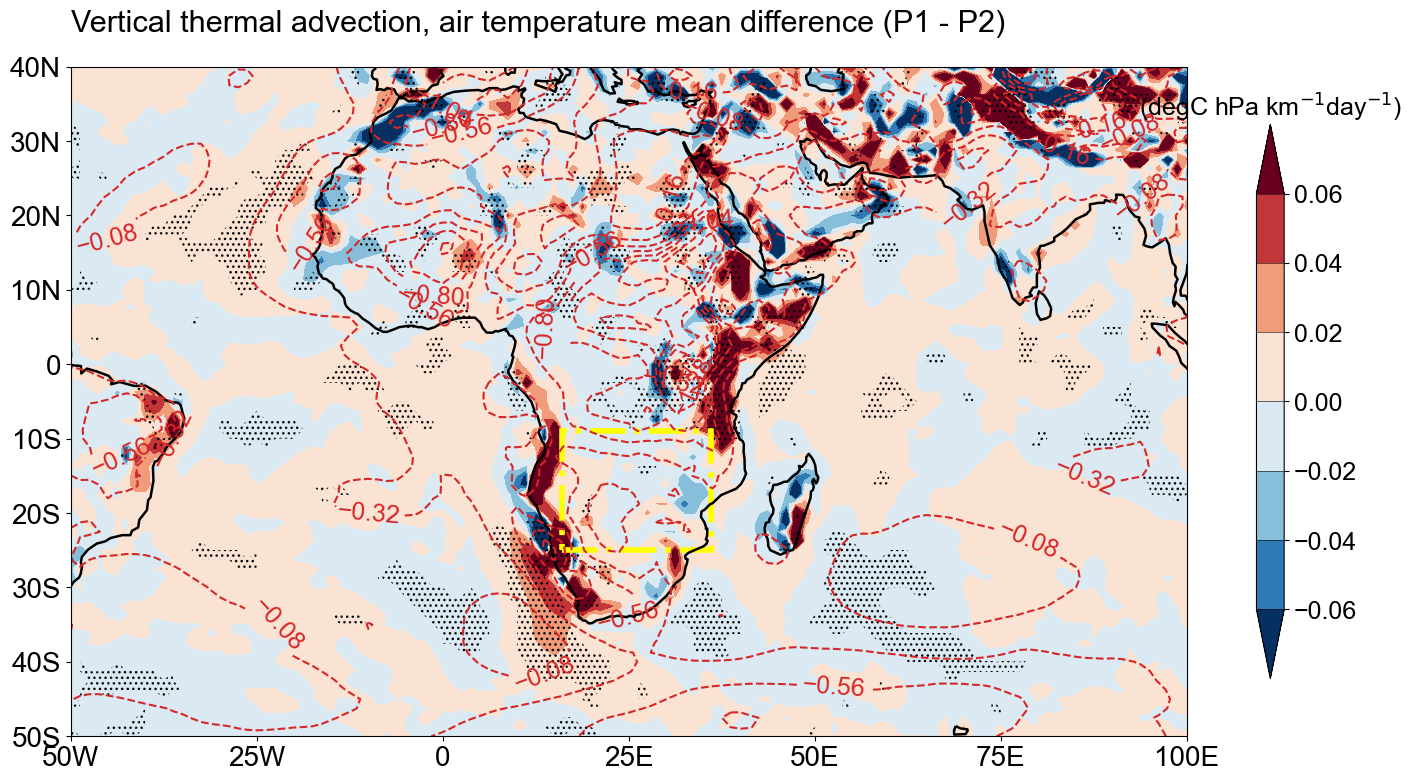

In [78]:
##### plotting
# Create a wider than normal figure to support our many plots
fig = plt.figure(figsize=(18,9))
plt.gcf().subplots_adjust(hspace=0.1, wspace=1)
plt.rcParams["font.family"] = "Arial"



def Plot(row, col, pos, diff, diff_sig, clevs, cbar_label, title):
    # Generate axes, using cartopy, drawing coastlines, and adding features
    projection = ccrs.PlateCarree()#(central_longitude=0)
    ax = fig.add_subplot(row, col, pos, projection=projection)
    plt.xlim([-50, 100])
    plt.ylim([-50, 40])
    plt.gca().set_yticks(np.arange(-50,50,10),crs=ccrs.PlateCarree())
    plt.gca().set_xticks(np.arange(-50,110,25),crs=ccrs.PlateCarree())
    #plt.xlim([-20, 55])
    #plt.ylim([-35, 40])
    #plt.gca().set_yticks(np.arange(-30,50,10),crs=ccrs.PlateCarree())
    #plt.gca().set_xticks(np.arange(-20,55,10),crs=ccrs.PlateCarree())
    #plt.xlim([-150, 150])
    #plt.ylim([-60, 60])
    #plt.gca().set_yticks(np.arange(-60,80,20),crs=ccrs.PlateCarree())
    #plt.gca().set_xticks(np.arange(-150,170,50),crs=ccrs.PlateCarree())
    lon_formatter=LongitudeFormatter(degree_symbol=''); lat_formatter=LatitudeFormatter(degree_symbol='')
    ax.xaxis.set_major_formatter(lon_formatter); ax.yaxis.set_major_formatter(lat_formatter);ax.tick_params(labelsize=20)
    xticks = ax.xaxis.get_major_ticks(); xticks[2].set_visible(True)
    
   # ax.coastlines(resolution='10m', color='black',linewidth=10)
    #ax.coastlines(resolution='10m', color='black', linewidth=0.7)
    #ax.add_feature(cfeature.BORDERS, linewidth=0.1)
    ax.set_xlabel("")
    ax.set_ylabel("")

    # Contourf-plot data
    temp = diff_adv.tadv.plot.contourf(ax=ax,
                           transform=ccrs.PlateCarree(),
                           levels=clevs,
                           cmap=plt.cm.RdBu_r,
                           add_colorbar=False,
                           extend='both')
    
    #ax.coastlines(resolution='10m', color='black',linewidth=1)
    ax.coastlines(linewidth=1.8)
   # ax.add_feature(cfeature.BORDERS, linewidth=1)
     # Plot Hatch
    pval = diff_sig
    cond = (pval <= 0.05)
    ## Mask out the areas that do not satisfy the conditions
    sig = pval.where(cond)
    
    ## make a hatch of significance
    plt.contourf(sig.lon,sig.lat,sig,hatches=['...'],alpha=0,
                 transform=ccrs.PlateCarree()) 
    
        # Add color bar
    cbar = plt.colorbar(temp,
                        orientation='vertical',
                        shrink=0.8,
                        extendfrac='auto', 
                        extendrect=False, 
                        drawedges=True)

    cbar.ax.tick_params(labelsize=18)
    cbar.set_ticks(clevs)
    cbar.ax.set_title(cbar_label, size=18)

    # Use geocat.viz.util convenience function to set titles and labels without calling several matplotlib functions
    gv.set_titles_and_labels(ax,
                            maintitle="",
                            lefttitle=title,
                            lefttitlefontsize=22,
                            righttitle="",
                            righttitlefontsize=22,
                            xlabel="",
                            ylabel="")


# define the levels for each variable
#clevs  = [-0.6 ,-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
#clevs  = [-0.4 ,-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5]
#clevs  = [-0.2, -0.15, -0.1, -0.05, 0, 0.05, 0.1, 0.15, 0.2,]
clevs  = [-0.06, -0.04, -0.02, 0, 0.02, 0.04, 0.06]
Plot(1, 1, 1, diff_adv, diff_sig, clevs, '(degC hPa km$^{-1}$day$^{-1}$)', "Vertical thermal advection, air temperature mean difference (P1 - P2)")

# Plot isotherms
cs = plt.contour(tmp2.lon, tmp2.lat, diff_temp.t, colors='tab:red', levels=np.arange(-2, 2, 0.24),
                linestyles='dashed', linewidths=1.5)
plt.clabel(cs, fontsize=18)

#plot wind quivers
#plt.quiver(X_wind[::2, ::2], Y_wind[::2, ::2], U_wind[::2, ::2], V_wind[::2, ::2], 
#           transform=ccrs.PlateCarree(), color='k', scale=25, width=0.0011,)

#add rectangle
plt.gca().add_patch(Rectangle((16,-25),20,16,
                    edgecolor='yellow', facecolor='none', linestyle="-.", linewidth=4))

fig.savefig('C:/Diabatic_data/extra3/advection/P1-P2_composite1_vertical_thermal advection.png', bbox_inches='tight', pad_inches = 0.1, dpi=300)
plt.show()

## God is great 